In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.

recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

values = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()    
for record in values:
    print (record)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

In [35]:
# Calculate the date one year from the last date in data set.
import datetime as dt
from dateutil.relativedelta import relativedelta

In [42]:
last_date= session.query(Measurement.date).order_by(Measurement.date).first()
last_date

('2010-01-01',)

In [45]:
oneyear_from_lastdate= dt.date(2010,8,23) + relativedelta(years= +1)
oneyear_from_lastdate

datetime.date(2011, 8, 23)

In [10]:
# Perform a query to retrieve the data and precipitation scores
all_precp_values = session.query(Measurement.date, Measurement.prcp).\
       order_by(Measurement.date).all()    
for record in all_precp_values:
    print (record)

('2010-01-01', 0.08)
('2010-01-01', 0.28)
('2010-01-01', 0.21)
('2010-01-01', 0.15)
('2010-01-01', 0.15)
('2010-01-01', 0.05)
('2010-01-01', 0.14)
('2010-01-02', 0.0)
('2010-01-02', 0.0)
('2010-01-02', 0.02)
('2010-01-02', 0.0)
('2010-01-02', 0.0)
('2010-01-02', 0.0)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-04', 0.0)
('2010-01-04', 0.01)
('2010-01-04', 0.0)
('2010-01-04', 0.0)
('2010-01-04', 0.0)
('2010-01-04', 0.0)
('2010-01-05', 0.0)
('2010-01-05', 0.02)
('2010-01-05', 0.01)
('2010-01-05', 0.0)
('2010-01-05', 0.0)
('2010-01-05', 0.0)
('2010-01-06', None)
('2010-01-06', 0.02)
('2010-01-06', 0.11)
('2010-01-06', 0.01)
('2010-01-06', 0.08)
('2010-01-06', 0.36)
('2010-01-07', 0.06)
('2010-01-07', 0.38)
('2010-01-07', None)
('2010-01-07', 0.7)
('2010-01-07', 0.17)
('2010-01-07', 0.04)
('2010-01-07', 0.3)
('2010-01-08', 0.0)
('2010-01-08', 0.0

('2012-12-30', 0.03)
('2012-12-30', 0.35)
('2012-12-30', 0.0)
('2012-12-30', 0.1)
('2012-12-31', 0.04)
('2012-12-31', 0.17)
('2012-12-31', None)
('2012-12-31', 0.0)
('2012-12-31', 0.42)
('2012-12-31', 0.0)
('2012-12-31', 0.04)
('2013-01-01', 0.02)
('2013-01-01', 0.16)
('2013-01-01', 0.38)
('2013-01-01', 0.36)
('2013-01-01', 0.0)
('2013-01-01', 0.24)
('2013-01-02', 0.13)
('2013-01-02', 0.07)
('2013-01-02', None)
('2013-01-02', 0.13)
('2013-01-02', 0.19)
('2013-01-02', 0.01)
('2013-01-02', 2.13)
('2013-01-03', 0.23)
('2013-01-03', 0.23)
('2013-01-03', 0.28)
('2013-01-03', 0.43)
('2013-01-03', 0.71)
('2013-01-03', 0.13)
('2013-01-03', 5.96)
('2013-01-04', 0.04)
('2013-01-04', 0.06)
('2013-01-04', 0.07)
('2013-01-04', 0.05)
('2013-01-04', 0.26)
('2013-01-04', 0.01)
('2013-01-04', 2.92)
('2013-01-05', 0.03)
('2013-01-05', 0.08)
('2013-01-05', 0.2)
('2013-01-05', 0.23)
('2013-01-05', 0.19)
('2013-01-05', 0.0)
('2013-01-05', 1.34)
('2013-01-06', 0.04)
('2013-01-06', 0.19)
('2013-01-06', 0.11)

('2016-02-25', 0.0)
('2016-02-25', None)
('2016-02-25', 0.0)
('2016-02-25', 0.0)
('2016-02-25', 0.0)
('2016-02-26', 0.0)
('2016-02-26', 0.38)
('2016-02-26', 0.36)
('2016-02-26', None)
('2016-02-26', 0.0)
('2016-02-26', 0.3)
('2016-02-26', 0.04)
('2016-02-27', 0.0)
('2016-02-27', 0.08)
('2016-02-27', 0.0)
('2016-02-27', None)
('2016-02-27', 0.0)
('2016-02-27', 0.0)
('2016-02-27', 0.0)
('2016-02-28', 0.0)
('2016-02-28', 0.0)
('2016-02-28', 0.0)
('2016-02-28', 0.0)
('2016-02-28', 0.0)
('2016-02-28', 0.0)
('2016-02-29', 0.0)
('2016-02-29', 0.0)
('2016-02-29', 0.05)
('2016-02-29', 0.0)
('2016-02-29', 0.0)
('2016-02-29', 0.0)
('2016-03-01', 0.0)
('2016-03-01', 0.0)
('2016-03-01', 0.07)
('2016-03-01', None)
('2016-03-01', 0.33)
('2016-03-01', 0.01)
('2016-03-01', 0.02)
('2016-03-02', 0.0)
('2016-03-02', 0.0)
('2016-03-02', 0.0)
('2016-03-02', None)
('2016-03-02', 0.0)
('2016-03-02', 0.0)
('2016-03-02', 0.0)
('2016-03-03', 0.0)
('2016-03-03', 0.0)
('2016-03-03', 0.0)
('2016-03-03', None)
('201

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precp_df=pd.DataFrame(all_precp_values)
precp_df.head()
# Sort the dataframe by date
precp_grouped_df=precp_df.groupby(precp_df.date).mean()
precp_grouped_df


,prcp
date,
2010-01-01,0.151429
2010-01-02,0.002857
2010-01-03,0.000000
2010-01-04,0.001429
2010-01-05,0.005000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


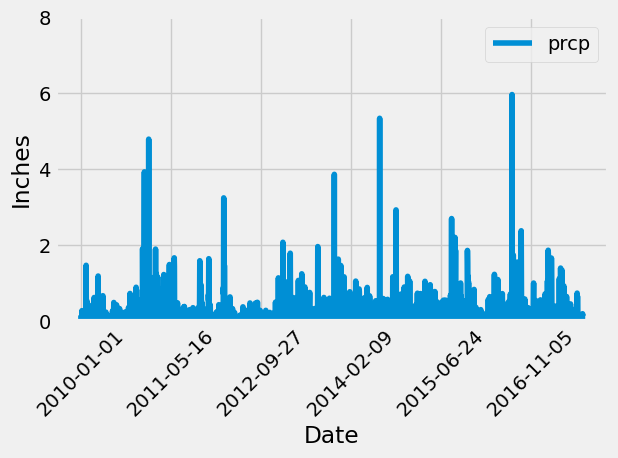

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precp_grouped_df.plot()
plt.ylim(0,8)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precp_grouped_df.describe()


,prcp
count,2792.000000
mean,0.161962
std,0.345704
min,0.000000
25%,0.010000
50%,0.058333
75%,0.173571
max,5.970000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations_data = session.query(Station.station).count()
stations_data 


9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Getting the most active station
most_active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()
most_active_station

('USC00519281', 2772)

In [26]:
#Lowest temperature
lowest_temp = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).desc().first()    

AttributeError: 'Query' object has no attribute 'desc'

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()